## **Exercise II**

Name: Parsa Youssefpour


In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
!pip install pyvirtualdisplay

In [ ]:
!sudo apt-get install xvfb

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

Iterations that were run: 44


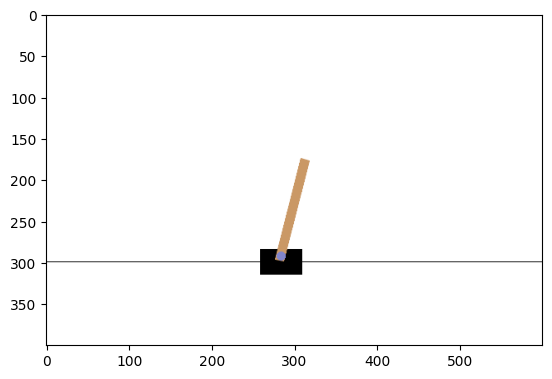

In [ ]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50000):
  action = env.action_space.sample()
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)

### **Exercise 1:**

Can you design a dynamic programming based policy for the agent as in assignment 1? If so, design it and demonstrate that it solves the cart pole problem.

### **Answer:**

 In this given problem there is no model of the eviroment, therefore MDP cannot be applied, hence its the problem cannot be solved via dynamic programming.

---


### **Exercise 2:**

Can you design a Monte Carlo based policy for the agent? What ingredients do you require? Explain the design flow, and execute it. Show that it works, or indicate why you can't proceed.

Answer:

It is possible ot solve this problem using monte carlo method. To solve this problem I will use the on-policy first visit MC control (for epsilon-soft policies).
The algorithm that I plan on using can be seen below:
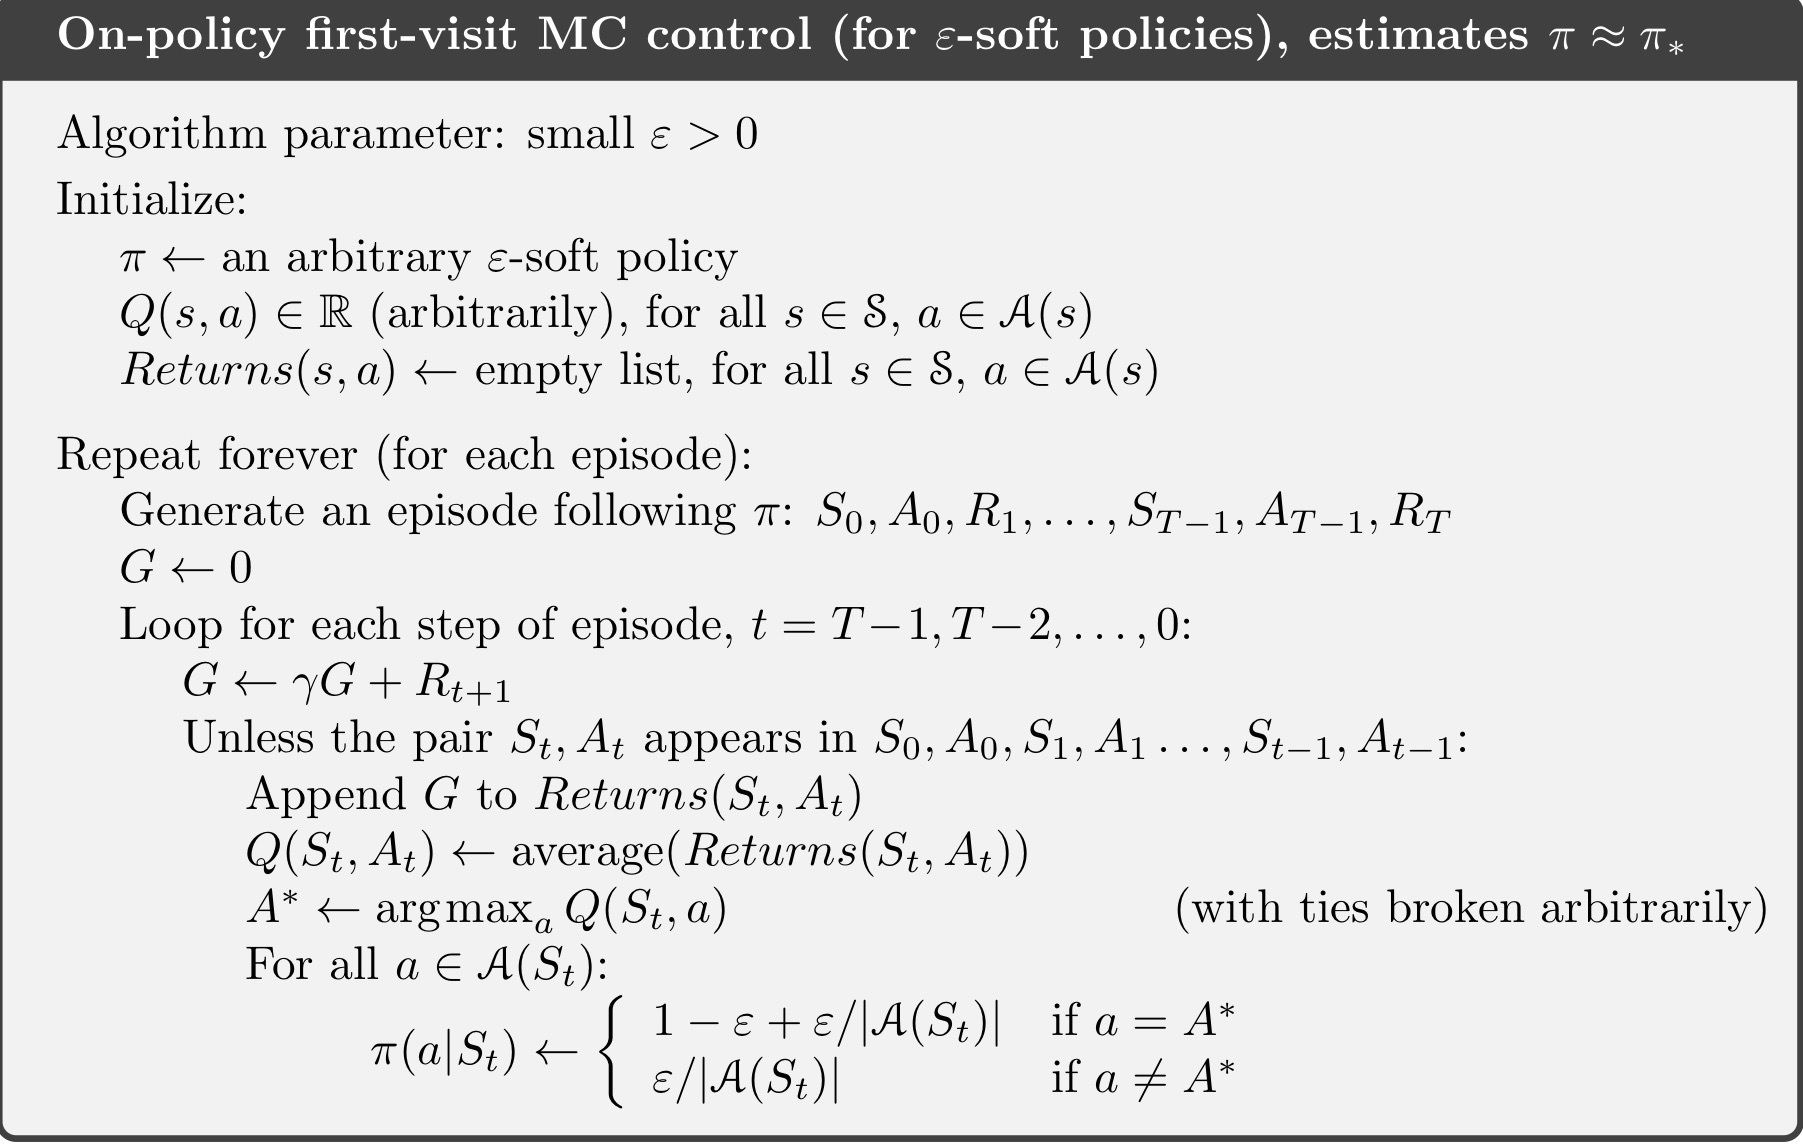

In [ ]:
import random
import numpy as np
from collections import defaultdict

In [ ]:
#initializing q
q={}

#returns dict used to store G values per state-action pair
returns = defaultdict()

#used to record how many times each state and action has been visited to take an average of the returns
number_visited = defaultdict()

#some of all rewards per epiode to see how q is improving per iteration
all_rewards =[]


#turning the multidimensional observation into a tuple to use it as a key for q dict
def create_state(observation):
  #rounding the 4 values in the observation, to reduce the number of states
  formatted_list = [ '%.1f' % elem for elem in observation ]
  return tuple(formatted_list)


def policy(state, epsilon):
  #initiating a new state with random values
  if state not in q.keys():
    q[state] = [0.5,0.5]

  #epsilon greedy for exploration
  if random.random() < epsilon:
    return np.argmax(q[state])
  else:
    return np.argmin(q[state])


#updating q
def update_q( episode , gamma):

  #creating a list with all the state action pairs experieced during the episode
  state_action_visited = [(state, action) for (state, action, reward) in episode]

  # creating a list of rewards per state action pairs
  rewards = [reward for (state, action, reward) in episode]

  #initialising G
  G = 0

  all_rewards.append(sum(rewards))

  #looping through the state action pairs in the episode to update the q
  for t in range(len(episode)-1):
    (state, action, reward) = episode[t]
    G = gamma * G + rewards[t+1]

    # first visit monte carlo
    if (state, action) not in state_action_visited[:t]:
      if (state,action) in returns.keys():
        returns[(state,action)] += G
        number_visited[(state, action)] +=1
      else:
        returns[(state,action)] = G
        number_visited[(state, action)] =1

      #taking average of return values to update the q for each state action pair
      q[state][action] = returns[(state,action)]/ number_visited[(state,action)]



#generate an episode, until the cartpole fails
def generate_episode(obs, epsilon):
  episode = []
  done = False
  while not done:
    #creating a state as the dictionary key
    state = create_state(obs)

    action = policy(state, epsilon)
    obs, reward, done, info = env.step(action)
    state = create_state(obs)
    episode.append((state, action, reward))

  return episode


#generating and updating multiple epsiodes and q
def MC(gamma, epsilon, epoch):

  for _ in range(epoch):
    obs = env.reset()
    #generating and episode
    episode = generate_episode(obs, epsilon = epsilon)
    #updating the q values based on the generated episode
    update_q(episode, gamma = gamma)

  return q


In [ ]:
env = gym.make("CartPole-v0")

In [ ]:
#calling the monte carlo function
q = MC(gamma = 0.99, epsilon = 0.2, epoch =100000)

200 0
Iterations that were run: 199


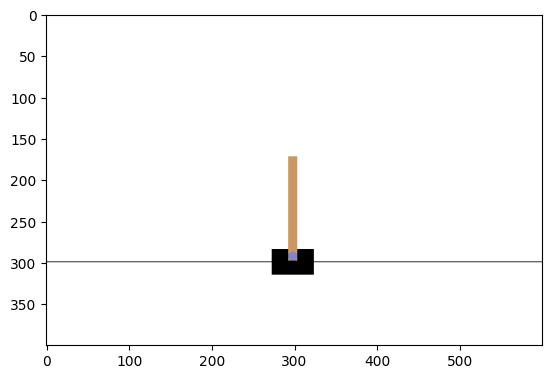

In [ ]:
#TESTING
env = gym.make("CartPole-v0")
obs = env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)
n_policy =0
n_random = 0
for i in range(50000):
  state = create_state(obs)
  try:
    action = np.argmax(q[state])
    print(action)
    print("POLICY")
    n_policy+=1

  #if somehow the state has not been visited in the training, generate a random move
  except:
    print("random")
    action = env.action_space.sample()
    n_random+=1
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()
print(n_policy,n_random)
print("Iterations that were run:",i)

### **Analysis**

It can be seen that the simulation has reached its maximum number of rewards (200) which means that the policy/ Q generated has learned the game.